In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

# Latar Belakang

Dalam dunia ritel, promosi merupakan salah satu strategi pemasaran yang umum digunakan oleh berbagai perusahaan untuk meningkatkan penjualan dan memperluas pangsa pasar mereka. Supermarket sebagai salah satu bentuk ritel memiliki peran yang signifikan dalam mendistribusikan berbagai produk ke konsumen. Oleh karena itu, penting untuk memahami efektivitas promosi di supermarket sebagai bagian dari strategi pemasaran yang dapat memengaruhi perilaku pembelian konsumen. 

# Masalah
1.Bagaimana Tingkat Penerimaan Konsumen terhadap Promosi di Supermarket?  
2.Profil dan Karakteristik Pelanggan  
3.Pengaruh Pendapatan terhadap Total Pengeluaran Produk  
4.Lebih mengutamakan promosi di toko fisik atau platform online  
5.Product apa yang yang di harus diutamakan untuk dipromosikan

# Goals
1.Mengukur sejauh mana konsumen merespon dan menerima berbagai jenis promosi yang ditawarkan oleh supermarket  
2.Bagaimana profil dan karakteristik pelanggan (usia, pendidikan, status perkawinan, pendapatan) berhubungan dengan kecenderungan partisipasi dalam program pemasaran atau respons terhadap promosi  
3.Sejauh mana pendapatan pelanggan memengaruhi total pengeluaran pada berbagai kategori produk (anggur, buah-buahan, daging, ikan, produk-manis, emas)?  
4.Bagaimana pola perilaku pembelian konsumen di toko fisik dan platform online berkontribusi terhadap keputusan promosi yang tepat?  
5.Prioritaskan promosi untuk produk yang kurang sering dibeli oleh konsumen, dengan tujuan meningkatkan kesadaran dan penjualan produk tersebut.

# Import dan Check Kondisi Data

### 1. Read CSV
Data Excel dipasahkan oleh /t maka harus menggunakan paramater seperator yang diisi \t

In [2]:
Data_Raw = pd.read_csv("Supermarket Customers.csv",sep="\t")
Data_Raw

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


|People||
|---|---|  
| ID| Customer's unique identifier  |
| Year_Birth| Customer's birth year  |
| Education| Customer's education level  |
| Marital_Status| Customer's marital status | 
| Income| Customer's yearly household income  |
| Kidhome| Number of children in customer's household  |
| Teenhome| Number of teenagers in customer's household  |
| Dt_Customer| Date of customer's enrollment with the company | 
| Recency| Number of days since customer's last purchase  |
| Complain| 1 if the customer complained in the last 2 years, 0 otherwise  |

|Products  | |
|---|---|  
| MntWines| Amount spent on wine in last 2 years |
| MntFruits| Amount spent on fruits in last 2 years |
| MntMeatProducts| Amount spent on meat in last 2 years |
| MntFishProducts| Amount spent on fish in last 2 years |
| MntSweetProducts| Amount spent on sweets in last 2 years| 
| MntGoldProds| Amount spent on gold in last 2 years |

|Promotion | | 
|---|---|  
| NumDealsPurchases| Number of purchases made with a discount |
| AcceptedCmp1| 1 if the customer accepted the offer in the 1st campaign, 0 otherwise |
| AcceptedCmp2| 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise |
| AcceptedCmp3| 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise |
| AcceptedCmp4| 1 if the customer accepted the offer in the 4th campaign, 0 otherwise |
| AcceptedCmp5| 1 if the customer accepted the offer in the 5th campaign, 0 otherwise |
| Response| 1 if the customer accepted the offer in the last campaign, 0 otherwise |

|Place  | |
|---|---|  
| NumWebPurchases| Number of purchases made through the company’s website |
| NumCatalogPurchases| Number of purchases made using a catalog |
| NumStorePurchases| Number of purchases made directly in stores |
| NumWebVisitsMonth| Number of visits to the company’s website in the last month| 

-----

### 2.Duplicate data



In [3]:
Data_Raw[Data_Raw.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Ditemukan tidak ada data yang duplicate

-----

### 3.NAN Data

In [4]:
(Data_Raw.isna().sum()/len(Data_Raw))*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

1.Di temukan di kolom income terdapat 1% Data berupa NAN  
2.Langkah yang bisa di lakukan adalah dengan cara mengisi NAN dengan median income pelanggan bedasarkan pendidikan terakhirnya

Mengisi NAN Income

In [5]:
Data_Raw.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
Data_Raw.groupby("Education")['Income'].median()

Education
2n Cycle      46805.0
Basic         20744.0
Graduation    52028.5
Master        50943.0
PhD           55212.0
Name: Income, dtype: float64

2n cycle sama dengan  maka langkah selanjutnya adalah mengubah 2n cycle menjadi master

In [7]:
Data_Raw.loc[Data_Raw['Education']=='2n Cycle','Education'] = 'Master'

In [8]:
median_edu = Data_Raw.groupby("Education")['Income'].median()
median_edu

Education
Basic         20744.0
Graduation    52028.5
Master        49605.0
PhD           55212.0
Name: Income, dtype: float64

Selanjutnya NAN income akan diisi dengan median income bedasarkan background pendidikan

In [9]:
for i in median_edu.index:
    Data_Raw.loc[(Data_Raw['Education']==i) & (Data_Raw['Income'].isna()),'Income'] = median_edu[i]

--------------

### 4. Variable mempermudah

menyatukan semua cmp dan semua prouduct ke dalam satu variable untuk mempermudah proses coding

In [10]:
AcceptCmp = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']
Products = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

------

### 5.Rentang Tahun Lahir Pelanggan

In [11]:
Data_Raw['Year_Birth'].value_counts()


Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64

Bisa dilihat tahun lahir pelanggan berasa dari tahun 1940 sampai 1996 tetapi ada 3 orang 
yang tanggal lahirnya berjarak lebih dari 40 tahun dari 1940, tahun 1893, 1899 dan 1900


In [12]:
Data_Raw[(Data_Raw['Year_Birth']==1893) | (Data_Raw['Year_Birth']==1899) | (Data_Raw['Year_Birth']==1900)][['Year_Birth']+AcceptCmp]

,Year_Birth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
192,1900,0,0,0,0,0,0
239,1893,0,0,0,0,0,0
339,1899,0,0,0,0,1,0


- 3 Pelanggan yang lahir nya di tahun 1900,1893 dan 1899. Dari total 18 promosi yang dilakukan hanya 1 yang keterima jadi bisa disimpulkan bahwa mereka tidak memberikan pengaruh yang banyak dalam hal penerimaan promosi
- karena kecil maka data pelanggan yang lahir di tahun tersebut bisa tidak digunakan 

In [13]:
Data_Raw = Data_Raw[~((Data_Raw['Year_Birth']==1893) | (Data_Raw['Year_Birth']==1899) | (Data_Raw['Year_Birth']==1900))]

----

### 6. Age Group
Disini akan dilakukan pengelompakan umur per 10 tahun dimulai dari umur 25 tahun
dengan membuat kolom baru terlebih dengan mengurangi 2023 dengan tahun lahir pelanggan  

In [14]:
Data_Raw['Age'] = 2023- Data_Raw['Year_Birth']
age_bins = range(25, 86, 10)
Data_Raw['AgeGroup'] = pd.cut(Data_Raw['Age'], bins=age_bins, labels=[f'{i}-{i+9}' for i in age_bins[:-1]])

C:\Users\usera\AppData\Local\Temp\ipykernel_27664\442396115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Raw['Age'] = 2023- Data_Raw['Year_Birth']
C:\Users\usera\AppData\Local\Temp\ipykernel_27664\442396115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Raw['AgeGroup'] = pd.cut(Data_Raw['Age'], bins=age_bins, labels=[f'{i}-{i+9}' for i in age_bins[:-1]])


-----

### 7. Total Anak

In [15]:
Data_Raw['Total Anak'] = Data_Raw['Teenhome'] + Data_Raw['Kidhome']
Data_Raw['Punya Anak'] = 'Yes' 

Data_Raw.loc[Data_Raw['Total Anak'] == 0, 'Punya Anak'] = 'No'

C:\Users\usera\AppData\Local\Temp\ipykernel_27664\221947151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Raw['Total Anak'] = Data_Raw['Teenhome'] + Data_Raw['Kidhome']
C:\Users\usera\AppData\Local\Temp\ipykernel_27664\221947151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Raw['Punya Anak'] = 'Yes'


Membuat kolom baru 'Total Anak' dengan menjumlahkan anak kecil dan anak remaja yang dimiliki oleh pelanggan  
Juga membuat kolom baru 'Punya Anak' yang akan diisi no jika 'Total Anak' sama dengan 0 lalu yes jika lebih dari 0  
Data nanti akan digunakan untuk mengetahui apakah memiliki anak mempunyayi hubungan dengan tingkat penerimaan promosi

----

### 8. Perubahan Tipe Data

Dari info data Dt_Customer yang berupa tanggal masih berbentuk objek maka harus dirubah dulu ke bentuk datetime agar dalam analisa nanti memudahkan untuk pengambilan tahun, bulan, hari, dst 

In [16]:
Data_Raw['Dt_Customer'] = pd.to_datetime(Data_Raw['Dt_Customer'], format="%d-%m-%Y")

C:\Users\usera\AppData\Local\Temp\ipykernel_27664\2411100182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Raw['Dt_Customer'] = pd.to_datetime(Data_Raw['Dt_Customer'], format="%d-%m-%Y")


----

### 9.Total Accepted Campaign
Disini dilakukan penjumlahan semua accepted campaign untuk analisa lanjutan mengetahui yang menerima paling tidak sekali dan yang tidak menerima sama sekali.  
jika penerimaan nya besar maka kita bisa meningkatkan nya dengan mengetahui mengapa mayoritas menerima tetapi jika penerimaan nya kecil maka untuk meningkatkan nya harus menganalisa mengapa banya ditolak

In [17]:
Data_Raw['TotalAccCmp'] = Data_Raw[AcceptCmp].sum(axis=1)

C:\Users\usera\AppData\Local\Temp\ipykernel_27664\3071894122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Raw['TotalAccCmp'] = Data_Raw[AcceptCmp].sum(axis=1)


### 10. Fungsi

In [18]:
def checkNormal(x):
    stat, p_value = shapiro(x)
    alpha = 0.05
    if p_value > alpha:
        print("Sample looks Gaussian (fail to reject H0)")
        print(p_value)
    else:
        print("Sample does not look Gaussian (reject H0)")
        print(p_value)

# Analisis

In [19]:
#Disini hanya ingin memetakan kolom beserta data dengan sampel 5 data
display(Data_Raw[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome','Teenhome', 'Dt_Customer', 'Recency', 'MntWines','MntFruits','MntMeatProducts']].head())
display(Data_Raw[['MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']].head())
display(Data_Raw[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','TotalAccCmp']].head())
display(Data_Raw[['Age','AgeGroup','Total Anak','Punya Anak']].head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118


,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,172,88,88,3,8,10,4,7
1,2,1,6,2,1,1,2,5
2,111,21,42,1,8,2,10,4
3,10,3,5,2,2,0,4,6
4,46,27,15,5,5,3,6,5


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response,TotalAccCmp
0,0,0,0,0,0,0,3,11,1,1
1,0,0,0,0,0,0,3,11,0,0
2,0,0,0,0,0,0,3,11,0,0
3,0,0,0,0,0,0,3,11,0,0
4,0,0,0,0,0,0,3,11,0,0


,Age,AgeGroup,Total Anak,Punya Anak
0,66,65-74,0,No
1,69,65-74,2,Yes
2,58,55-64,0,No
3,39,35-44,1,Yes
4,42,35-44,1,Yes


-------

### Proporsi orang yang menerima dan menolak promosi




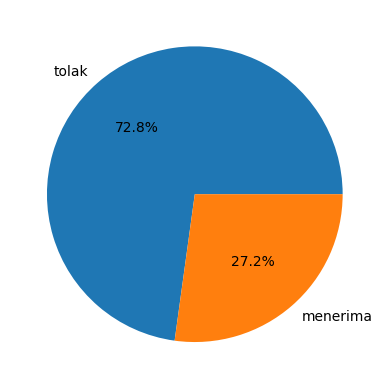

In [20]:
tolak = Data_Raw['TotalAccCmp'].value_counts()[0]
menerima = Data_Raw['TotalAccCmp'].value_counts()[1:].sum()
plt.pie([tolak,menerima],labels=['tolak','menerima'],autopct='%1.1f%%')
plt.show()

Bisa dilihat 72.8% pelanggan menolak promosi dan 27.2% menerima promosi

Kesimpulan: Untuk analisa selanjutnya akan berfokus kepada yang menolak untuk mengetahui pengebab mereka menolak

------

### Persebaran Umur beserta persentase per kelompok umur yang menolak

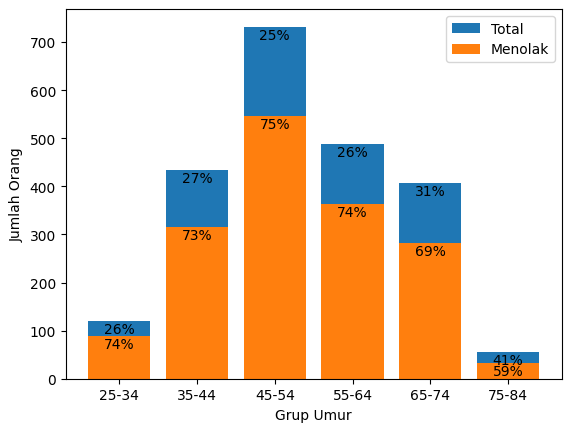

In [21]:
x = Data_Raw[Data_Raw['TotalAccCmp']==0]['AgeGroup'].value_counts().sort_index()
x1 = Data_Raw['AgeGroup'].value_counts().sort_index()
bar_positions_group1 = np.arange(len(x.index))
for i,value in enumerate(x.values):
    plt.text(bar_positions_group1[i],value-25,f'{(100*value/x1.values[i]):.0f}%',ha='center')
for i,value in enumerate(x1.values):
    plt.text(bar_positions_group1[i],value-25,f'{(100*(value-x.values[i])/x1.values[i]):.0f}%',ha='center')
plt.bar(x1.index,x1.values,label='Total')
plt.bar(x.index,x.values,label='Menolak')
plt.xlabel("Grup Umur")
plt.ylabel("Jumlah Orang")
plt.legend()
plt.show()


Di sini dapat dilihat secara kelompok umur 45-54 tahun memiliki total orang yang paling banyak dan juga memiliki persentase penolakan yang paling tinggi dibandingkan kelompok lain

Kesimpulan: Jadi untuk analisa lebih lanjut maka kelompok 45-54 tahun yang akan jadi fokus analisis

----

### Perbedaan rata-rata income antar pelanggan yang menerima dan yang menolak promosi

Sebelum melakukan analisis dilakukan pengecekan apakah data income tersebar secara normal atau tidak

In [22]:
checkNormal(Data_Raw['Income'])

Sample does not look Gaussian (reject H0)
0.0


Ditemukan bahwa Data income tidak tersebar dengan normal dengan p sebesar 0 maka untuk pemusatan data menggunakan median

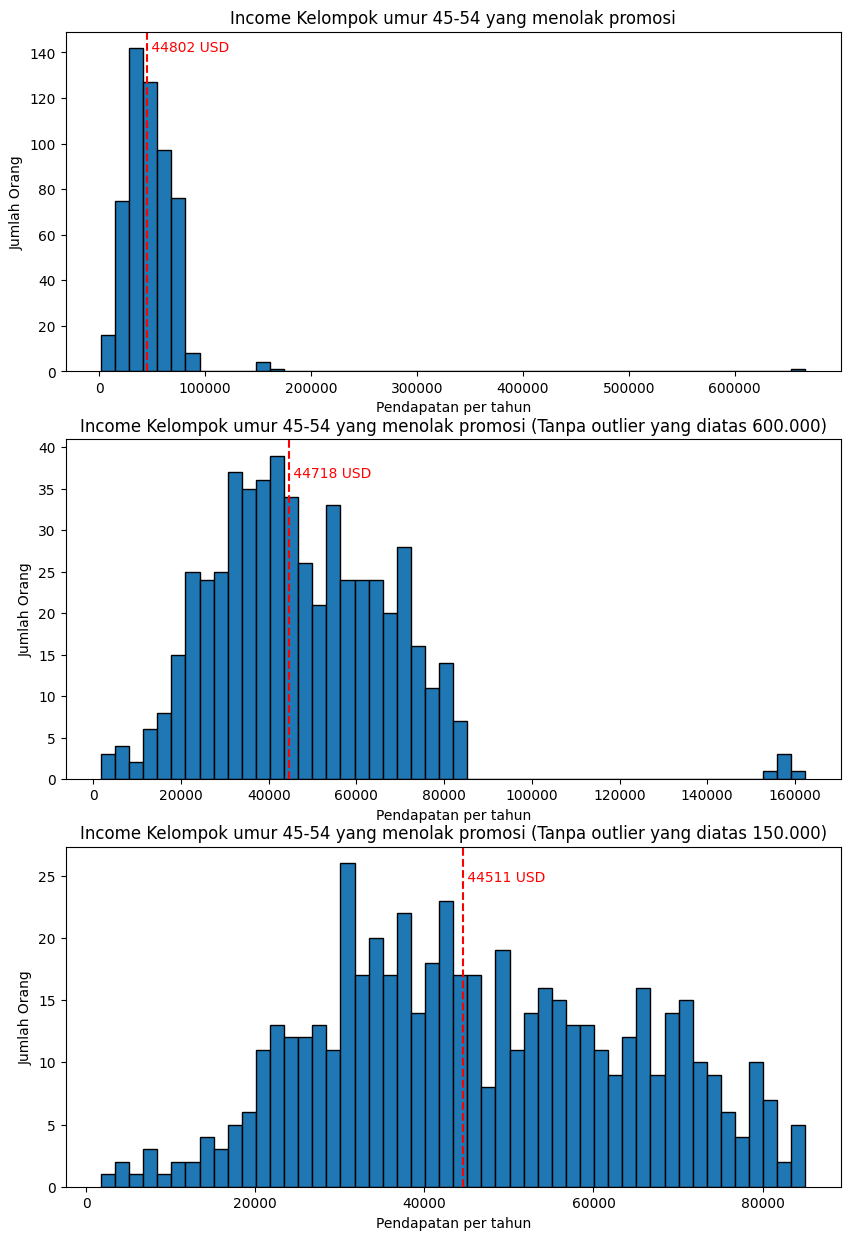

In [23]:
Tolak_45 = Data_Raw[(Data_Raw['AgeGroup']=='45-54') & (Data_Raw['TotalAccCmp']==0)]
Tolak_45_1 = Data_Raw[(Data_Raw['AgeGroup']=='45-54') & (Data_Raw['TotalAccCmp']==0) & (Data_Raw['Income']<200000)]
Tolak_45_2 = Data_Raw[(Data_Raw['AgeGroup']=='45-54') & (Data_Raw['TotalAccCmp']==0) & (Data_Raw['Income']<140000)]

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot the first chart
axs[0].hist(Tolak_45["Income"], bins=50, edgecolor='black')
axs[0].set_title('Income Kelompok umur 45-54 yang menolak promosi')
axs[0].axvline(x=Tolak_45["Income"].median(), color='r', linestyle='--')
axs[0].text(Tolak_45["Income"].median(), axs[0].get_ylim()[1]-10, f' {Tolak_45["Income"].median():.0f} USD', color='r', va='bottom', ha='left')
axs[0].set_xlabel('Pendapatan per tahun')
axs[0].set_ylabel('Jumlah Orang')


# Plot the second chart
axs[1].hist(Tolak_45_1["Income"], bins=50, edgecolor='black')
axs[1].set_title('Income Kelompok umur 45-54 yang menolak promosi (Tanpa outlier yang diatas 600.000)')
axs[1].axvline(x=Tolak_45_1["Income"].median(), color='r', linestyle='--')
axs[1].text(Tolak_45_1["Income"].median(), axs[1].get_ylim()[1]-5, f' {Tolak_45_1["Income"].median():.0f} USD', color='r', va='bottom', ha='left')
axs[1].set_xlabel('Pendapatan per tahun')
axs[1].set_ylabel('Jumlah Orang')


# Plot the third chart
axs[2].hist(Tolak_45_2["Income"], bins=50, edgecolor='black')
axs[2].set_title('Income Kelompok umur 45-54 yang menolak promosi (Tanpa outlier yang diatas 150.000)')
axs[2].axvline(x=Tolak_45_2["Income"].median(), color='r', linestyle='--')
axs[2].text(Tolak_45_2["Income"].median(), axs[2].get_ylim()[1]-3, f' {Tolak_45_2["Income"].median():.0f} USD', color='r', va='bottom', ha='left')
axs[2].set_xlabel('Pendapatan per tahun')
axs[2].set_ylabel('Jumlah Orang')



# Show the plot
plt.show()

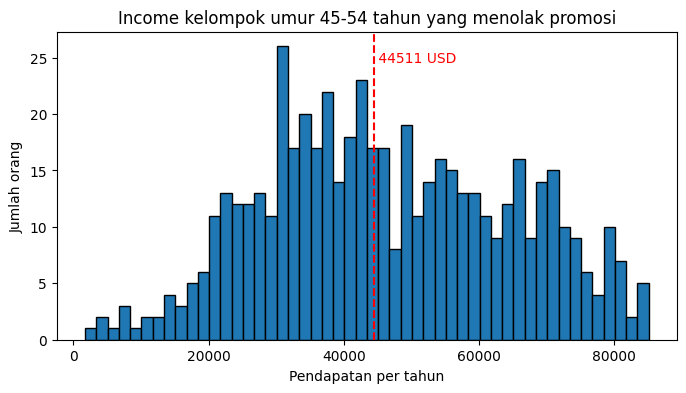

In [24]:
plt.figure(figsize=(8,4))
plt.hist(Tolak_45_2["Income"], bins=50, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Income kelompok umur 45-54 tahun yang menolak promosi')
plt.axvline(x=Tolak_45_2["Income"].median(), color='r', linestyle='--')
plt.text(Tolak_45_2["Income"].median(), axs[2].get_ylim()[1]-3, f' {Tolak_45_2["Income"].median():.0f} USD', color='r', va='bottom', ha='left')
plt.xlabel('Pendapatan per tahun')
plt.ylabel('Jumlah orang')

# Show the plot
plt.show()

### Income kelompok umur 45-54 tahun yang menolak promosi

Di pusat persebaran data, income tersebar di rentan diatas 0 usd sampai dibawah 90.000 usd tetapi ditemukan nya ada outlier yang dimana ada yang pendaptan nya diatas 140.000 usd dan yang paling jauh diatas 600.000 usd.

oleh karena itu ditampilkan 3 chart yaitu yang pertama include semua pelanggan,yang kedua tanpa yang diatas 660.000 dan yang ketiga tanpa yang diatas 140.000 atau bisa dibilang hanya data yang ada di pusat persebaran data.

untuk yang di pusat persebaran data, median pendapatan pelanggan per tahun sebesar 44511 usd 

untuk analisis selanjutnya hanya fokus pada yang berlokasi di pusat persebaran data saja

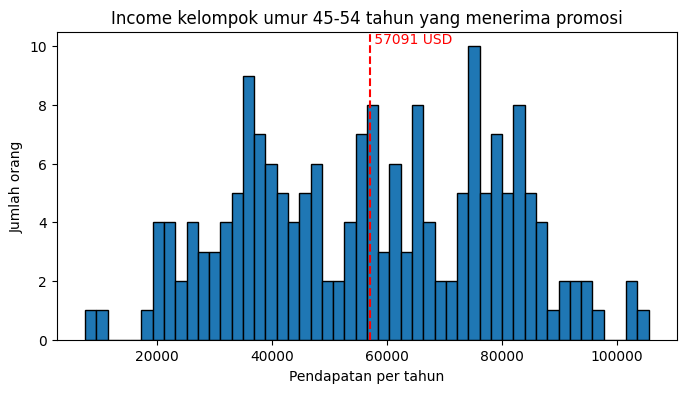

In [25]:
plt.figure(figsize=(8,4))
Terima_45 = Data_Raw[(Data_Raw['AgeGroup']=='45-54') & (Data_Raw['TotalAccCmp']>0)]
Terima_45['Income']
plt.hist(Terima_45["Income"], bins=50, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Income kelompok umur 45-54 tahun yang menerima promosi')
plt.axvline(x=Terima_45["Income"].median(), color='r', linestyle='--')
plt.text(Terima_45['Income'].median(),10,f' {Terima_45["Income"].median():.0f} USD', color='r', va='bottom', ha='left')
plt.xlabel('Pendapatan per tahun')
plt.ylabel('Jumlah orang')

# Show the plot
plt.show()

### Income kelompok umur 45-54 tahun yang menerima promosi

Di data kelompok ini median pendapatan pertahun sebesar 57091 usd  
Jika dibandingkan dengan kelompok umur 45-54 tahun yang menolak promosi maka kelompok yang menerima promosi ini memiliki median pendapatan pertahun lebih tinggi sekitar 12rb usd 

Kesimpulan: yang menolak promosi punya pendapatan lebih rendah dengan yang menerima promosi

In [26]:
statistic, p_value = mannwhitneyu(Terima_45['Income'], Tolak_45_2['Income'], alternative='greater')

# Display the results
print(f"Mann-Whitney U Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Check for significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Dari kelompok Umur 45-54 tahun,Median income yang menerima promosi lebih besar dari yang menolak promosi.")
else:
    print("Fail to reject the null hypothesis. Dari kelompok Umur 45-54 tahun,Median income yang menerima promosi lebih Kecil dari yang menolak promosi.")

Mann-Whitney U Statistic: 64205.0
P-Value: 4.42873498418312e-09
Reject the null hypothesis. Dari kelompok Umur 45-54 tahun,Median income yang menerima promosi lebih besar dari yang menolak promosi.


-----

### Mengetahui lebih banyak belanja di website atau di supermarket

In [27]:
checkNormal(Tolak_45_2['NumWebPurchases'])
checkNormal(Tolak_45_2['NumStorePurchases'])

Sample does not look Gaussian (reject H0)
7.203940188531326e-21
Sample does not look Gaussian (reject H0)
9.065885377193762e-22


Setelah di uji normalitas ditemukan bahwa data 'NumWebPurchases' dan 'NumStorePurchases' tidak berdistribusi noraml, maka dalam analisa lebih lanjut akan menggunakan pendekatan non-parametric untuk mengetahui di mana lebih banyak berbelanja

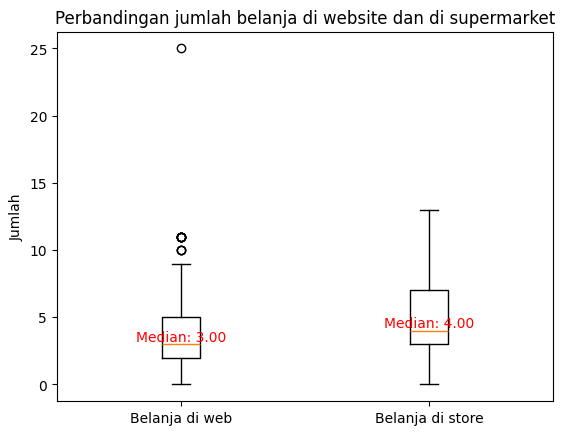

In [28]:
fig, ax = plt.subplots()

# Create two box plots side by side
ax.boxplot([Tolak_45_2['NumWebPurchases'], Tolak_45_2['NumStorePurchases']], labels=['Belanja di web', 'Belanja di store'])

# Add labels and title
ax.set_ylabel('Jumlah')
ax.set_title('Perbandingan jumlah belanja di website dan di supermarket')
for i, median in enumerate([np.median(Tolak_45_2['NumWebPurchases']), np.median(Tolak_45_2['NumStorePurchases'])]):
    ax.text(i + 1, median, f'Median: {median:.2f}', horizontalalignment='center', verticalalignment='bottom', color='red')

# Show the plot
plt.show()

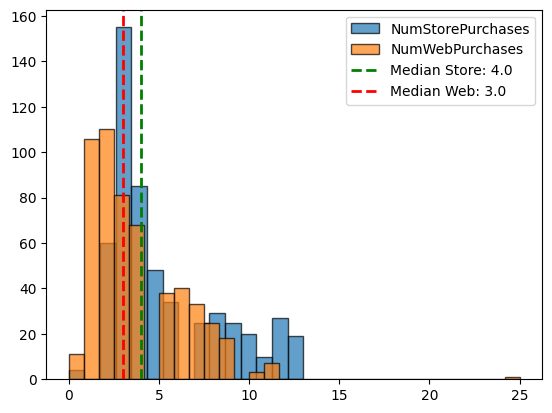

In [29]:
plt.hist(Tolak_45_2['NumStorePurchases'], bins=15, edgecolor='black', alpha=0.7, label='NumStorePurchases')
plt.hist(Tolak_45_2['NumWebPurchases'], bins=30, edgecolor='black', alpha=0.7, label='NumWebPurchases')
# Adding legend
plt.legend(['NumWebPurchases', 'NumStorePurchases'])

# Calculate medians
median_web = Tolak_45_2['NumWebPurchases'].median()
median_store = Tolak_45_2['NumStorePurchases'].median()

# Adding median lines
plt.axvline(median_store, color='green', linestyle='dashed', linewidth=2, label=f'Median Store: {median_store}')
plt.axvline(median_web, color='red', linestyle='dashed', linewidth=2, label=f'Median Web: {median_web}')

# Show the plot
plt.legend()
plt.show()

Dari chart bisa dilihat secara median, yang berbelanja di store memiliki median lebih tinggi dari yang berbelanja di web sehingga bisa diasumsikan bahwa yang berbelanja di store lebih banya dari pada yang di web. untuk pembuktian lebih lanjut akan dilakukan uji statistik menggunakan mann whitney

In [30]:
statistic, p_value = mannwhitneyu(Tolak_45_2['NumWebPurchases'],Tolak_45_2['NumStorePurchases'], alternative='less')

# Display the results
print(f"Mann-Whitney U Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Check for significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Dari kelompok Umur 45-54 tahun yang menolak promosi Lebih banyak berbelanja di toko.")
else:
    print("Fail to reject the null hypothesis. Dari kelompok Umur 45-54 tahun yang menolak promosi Lebih banyak berbelanja di web.")

Mann-Whitney U Statistic: 97982.5
P-Value: 1.0419734270313828e-21
Reject the null hypothesis. Dari kelompok Umur 45-54 tahun yang menolak promosi Lebih banyak berbelanja di toko.


Setelah uji statistik terbukti bahwa memang belanja di toko lebih banya di bandingkan di web sehingga bisa fokus saja pada promosi di toko

-----

### Mengathui jumlah barang yang di beli di toko

['red', 'red', 'red', 'red', 'blue', 'blue']


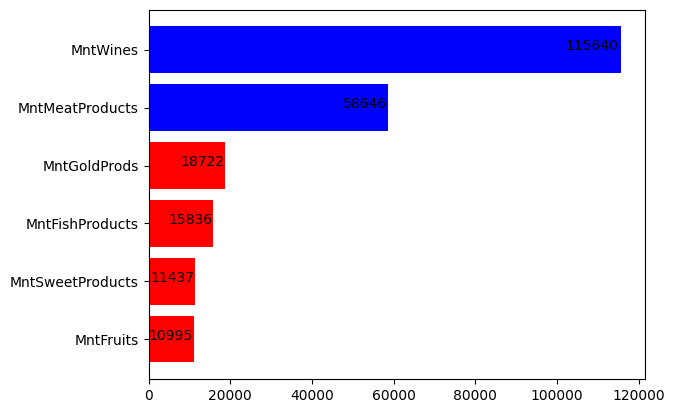

In [31]:
barang = Tolak_45_2[Tolak_45_2['NumStorePurchases']>0][Products].sum()
barang = barang.sort_values()

bar_pos_1 = np.arange(len(barang.index))
colors = ['red' if value < 50000 else 'blue' for value in barang.values]
print(colors)
plt.barh(bar_pos_1,barang.values,label = 'Tidak Punya Anak',color=colors)
for i,value in enumerate(barang.values):
    if i != 5:
        plt.text(value-11000,bar_pos_1[i],f'{value:.0f}')
plt.text(barang.iloc[5]-13500,5,barang.iloc[5])
plt.yticks(bar_pos_1,barang.index)
plt.show()


Dari 6 products, 2 product yang paling banyak di beli di toko adalah wine dan daging, Sehingga fokus product yang harus dipromosikan bisa berfokus ke GoldProds, FishProducts, SweetProducts dan Fruit.

Maka product yang bisa dijadikan fokus adalah emas, ikan ,manis-manisan dan buah

------

### Kesimpulan Akhir

- Ditemukan dari seluruh promosi yang di lakukan terhadap pelanggan, 72.8% menolak promosi
- Dari semua pelanggan, dari sisi umur kelompok umur 45-54 tahun yang mayoritas dan di kelompok tersebut terdapat 75% yang menolak promosi
- Dari kelompok 45-54 tahun, mereka yang menolak promosi memiliki median income pertahun lebih kecil 12 rb dibandingkan yang menerima promosi
- Secara perbandingan banyak jumlah berbelanja, lebih banyak pelanggan berbelanja di toko
- Dari seluruh barang yang dibeli, wine dan daging adalah 2 barang yang paling banya dibeli

Suggestion

- Fokus kan promosi ke pada pelanggan yang berumur 45-54 tahun 
- Promosi fokus dilakukan di toko fisik
- harga barang yang di promosi lebih murah dibandingkan barang dipromosikan sebelumnya
- Ada 3 cara yang bisa di approach:
    - promosi dengan tema kesehatan dengan produk ikan dan buah yang punya harga murah
    - promosi tentang investasi jangka panjang dengan produk emas
    - promosi dengan tema lebih dekat dengan anak dengan produk manis-manisan

In [34]:
Data_Raw.to_excel('Target.xlsx',index=False)